# Sales Prediction Model

# Data Dictionary

# Load necessary libraries

In [16]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [17]:
dfS_train = pd.read_csv('train.csv')
dfS_test = pd.read_csv('test.csv')

# EDA

## First Five Rows of the datasets

In [18]:
pd.set_option('display.max_columns', None)
dfS_train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [19]:
pd.set_option('display.max_columns', None)
dfS_test.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


## Info

In [20]:
dfS_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [21]:
dfS_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

## Checking Null Values

In [22]:
dfS_train.isnull().sum()[dfS_train.isnull().sum()>0]

products_purchased    20911
signup_date           15113
dtype: int64

In [23]:
dfS_test.isnull().sum()[dfS_test.isnull().sum()>0]

products_purchased    8136
signup_date           6649
dtype: int64

## Summary of the data

In [24]:
pd.set_option('display.max_columns', None)
dfS_train.describe(include = "all")

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161,39161.000000,39161.000000,18250.000000,24048,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
unique,NaN,365,NaN,NaN,NaN,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12-26,NaN,NaN,NaN,2021-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,181,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,19581.000000,NaN,6.523812,6.452746,2.154137,NaN,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,NaN,3.472944,2.614296,0.779815,NaN,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,NaN,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,NaN,4.000000,5.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,NaN,6.000000,6.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,NaN,9.000000,8.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
pd.set_option('display.max_columns', None)
dfS_test.describe(include = "all")

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184,13184.000000,13184.000000,5048.000000,6535,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
unique,NaN,89,NaN,NaN,NaN,1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2022-01-23,NaN,NaN,NaN,2022-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,176,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45753.500000,NaN,7.724439,7.943416,2.108954,NaN,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,NaN,3.599981,2.687832,0.783483,NaN,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,NaN,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,NaN,5.000000,6.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,NaN,8.000000,8.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,NaN,10.000000,10.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Checking whether the customers are unique or not

In [28]:
dfS_train['id'].nunique()

39161

In [27]:
dfS_test['id'].nunique()

13184

# Convert object to date

In [101]:
dfS_train['created_at'] =  pd.to_datetime(dfS_train['created_at'], infer_datetime_format=True)
dfS_test['created_at'] =  pd.to_datetime(dfS_test['created_at'], infer_datetime_format=True)

In [102]:
dfS_train['signup_date'] =  pd.to_datetime(dfS_train['signup_date'], infer_datetime_format=True)
dfS_test['signup_date'] =  pd.to_datetime(dfS_test['signup_date'], infer_datetime_format=True)


In [103]:
dfS_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   created_at            39161 non-null  datetime64[ns]
 1   campaign_var_1        39161 non-null  int64         
 2   campaign_var_2        39161 non-null  int64         
 3   products_purchased    18250 non-null  float64       
 4   signup_date           24048 non-null  datetime64[ns]
 5   user_activity_var_1   39161 non-null  int64         
 6   user_activity_var_2   39161 non-null  int64         
 7   user_activity_var_3   39161 non-null  int64         
 8   user_activity_var_4   39161 non-null  int64         
 9   user_activity_var_5   39161 non-null  int64         
 10  user_activity_var_6   39161 non-null  int64         
 11  user_activity_var_7   39161 non-null  int64         
 12  user_activity_var_8   39161 non-null  int64         
 13  user_activity_va

In [104]:
dfS_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    13184 non-null  int64         
 1   created_at            13184 non-null  datetime64[ns]
 2   campaign_var_1        13184 non-null  int64         
 3   campaign_var_2        13184 non-null  int64         
 4   products_purchased    5048 non-null   float64       
 5   signup_date           6535 non-null   datetime64[ns]
 6   user_activity_var_1   13184 non-null  int64         
 7   user_activity_var_2   13184 non-null  int64         
 8   user_activity_var_3   13184 non-null  int64         
 9   user_activity_var_4   13184 non-null  int64         
 10  user_activity_var_5   13184 non-null  int64         
 11  user_activity_var_6   13184 non-null  int64         
 12  user_activity_var_7   13184 non-null  int64         
 13  user_activity_va

## Checking for duplicate rows

In [105]:
dups = dfS_train.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dfS_train[dups]

Number of duplicate rows = 0


,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,


In [106]:
dups = dfS_test.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dfS_test[dups]

Number of duplicate rows = 0


,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12


# Checking whether the dataset is balanced or not

In [107]:
dfS_train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

## Univariate Analysis

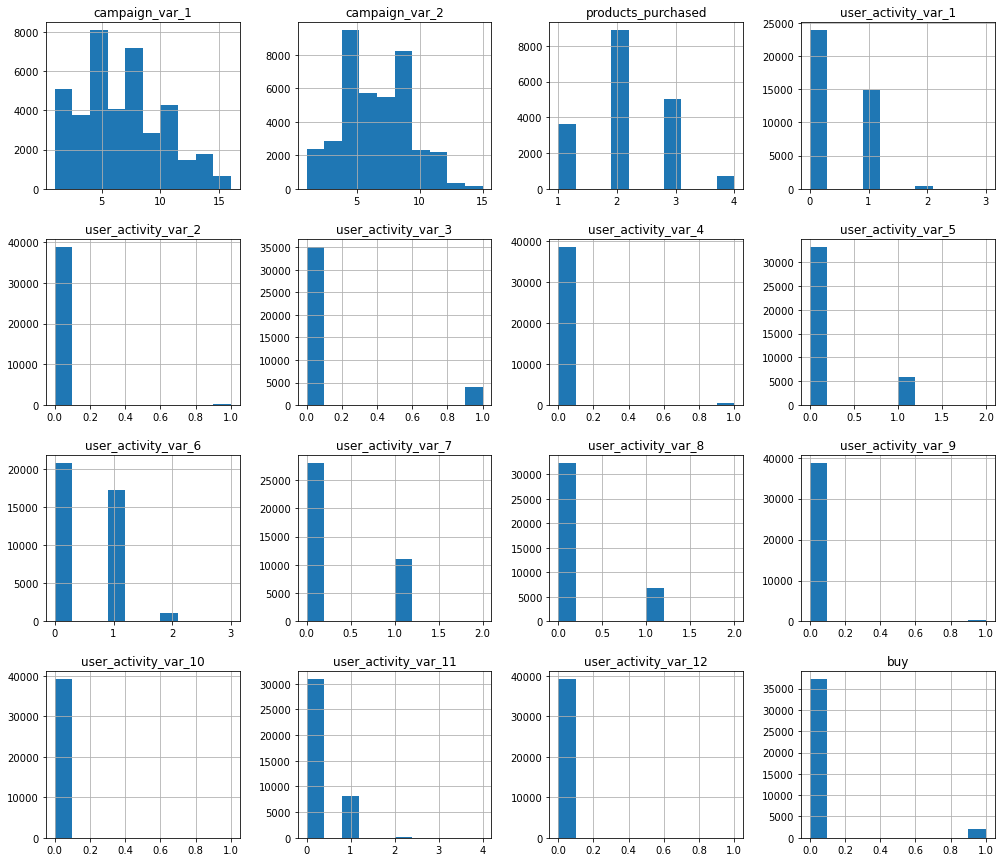

In [108]:
#Check the distribution of numeric variables
from pylab import rcParams
rcParams['figure.figsize'] = 17, 15
dfS_train.hist();

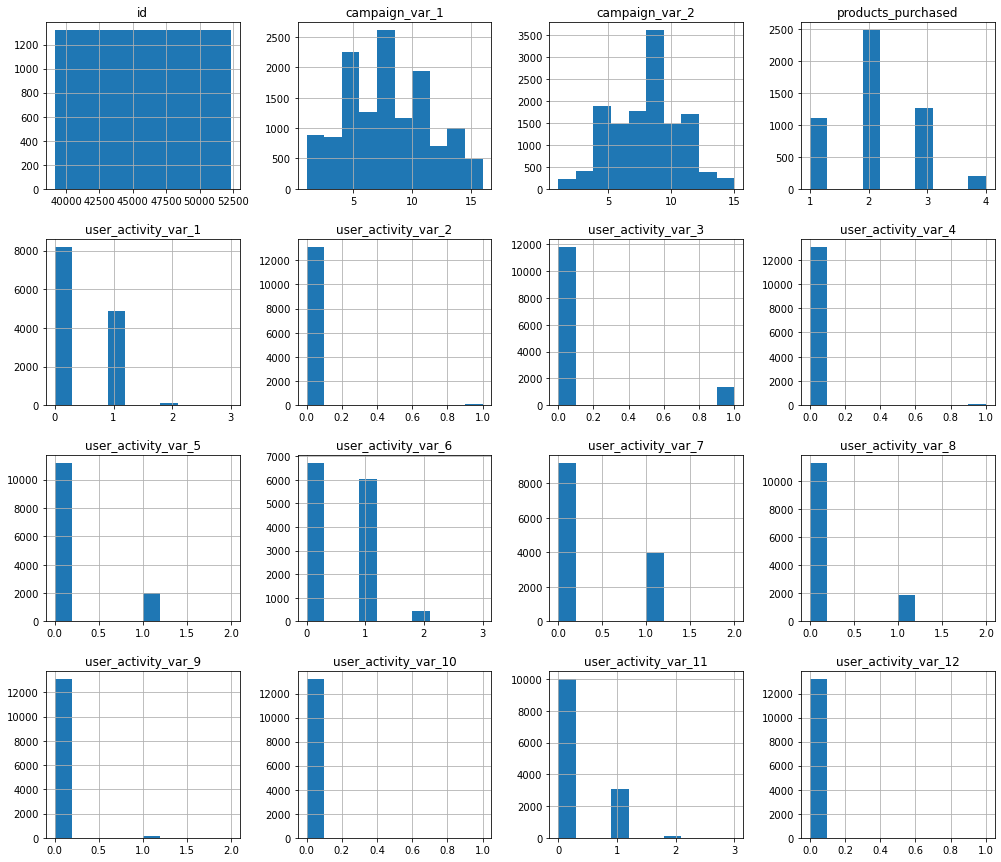

In [109]:
#Check the distribution of numeric variables
from pylab import rcParams
rcParams['figure.figsize'] = 17, 15
dfS_test.hist();

In [ ]:
difference = (curr_time-train_data.created_at)/np.timedelta64(1,'W')

# Null Value Treatment

In [31]:
import numpy as np


In [40]:
df_model_train = dfS_train['products_purchased'].fillna((dfS_train['products_purchased'].median()))
df_model_test = dfS_test['products_purchased'].fillna((dfS_train['products_purchased'].median()))




In [112]:

df_model_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        13184 non-null  int64  
 1   campaign_var_2        13184 non-null  int64  
 2   products_purchased    13184 non-null  float64
 3   user_activity_var_1   13184 non-null  int64  
 4   user_activity_var_2   13184 non-null  int64  
 5   user_activity_var_3   13184 non-null  int64  
 6   user_activity_var_4   13184 non-null  int64  
 7   user_activity_var_5   13184 non-null  int64  
 8   user_activity_var_6   13184 non-null  int64  
 9   user_activity_var_7   13184 non-null  int64  
 10  user_activity_var_8   13184 non-null  int64  
 11  user_activity_var_9   13184 non-null  int64  
 12  user_activity_var_10  13184 non-null  int64  
 13  user_activity_var_11  13184 non-null  int64  
 14  user_activity_var_12  13184 non-null  int64  
dtypes: float64(1), int6

# Model Building

In [113]:
# Copy all the predictor variables into X dataframe
X = df_model_train.drop(['buy'], axis=1)
from sklearn.preprocessing import scale
#Scaled the data
X = scale(X)
# Copy target into the y dataframe. 
y = df_model_train['buy']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=142,stratify= y)

In [114]:
y_train.value_counts(1)

0    0.948991
1    0.051009
Name: buy, dtype: float64

# Logistic Regression

In [115]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [116]:

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.5s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [117]:
ytrain_predict = model.predict(X_train)

In [118]:
model.score(X_train, y_train)

0.9739210929519918

In [119]:
print(classification_report(y_train, ytrain_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     29730
           1       0.96      0.51      0.67      1598

    accuracy                           0.97     31328
   macro avg       0.97      0.76      0.83     31328
weighted avg       0.97      0.97      0.97     31328



In [120]:
pred_val = model.predict(X_val)

In [121]:
print(classification_report(y_val, pred_val ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.97      0.48      0.64       400

    accuracy                           0.97      7833
   macro avg       0.97      0.74      0.82      7833
weighted avg       0.97      0.97      0.97      7833



# Prediction on Test Data Set 

In [122]:
X_test = scale(df_model_test)
pred_test = model.predict(X_test)

In [123]:
Sub = pd.read_csv('sample_submission_2zvVjBu.csv')

In [124]:
Sub['buy'] = pred_test

In [125]:
Sub.to_csv('Sub2.csv')



# Smote

As the data is imbalanced we are using the smote

In [126]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [127]:

model1 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model1.fit(X_res, y_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [128]:
yres_predict = model1.predict(X_res)

In [129]:
model1.score(X_res, y_res)

0.8352674066599395

In [130]:
print(classification_report(y_res, yres_predict ))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     29730
           1       0.86      0.80      0.83     29730

    accuracy                           0.84     59460
   macro avg       0.84      0.84      0.84     59460
weighted avg       0.84      0.84      0.84     59460



In [131]:
pred_val_smote = model1.predict(X_val)

In [132]:
print(classification_report(y_val, pred_val_smote ))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7433
           1       0.24      0.81      0.38       400

    accuracy                           0.86      7833
   macro avg       0.62      0.84      0.65      7833
weighted avg       0.95      0.86      0.89      7833



# Prediction on Test Data Set 

In [133]:
X_test = scale(df_model_test)
pred_test_smote = model1.predict(X_test)

In [134]:
#Sub = pd.read_csv('sample_submission_2zvVjBu.csv')

In [135]:
Sub['buy'] = pred_test_smote 

In [136]:
Sub.to_csv('Sub1.csv')



# Using Best Grid

In [137]:
grid= {'penalty':['l2','15', '17''none'],
     'solver':['lbfgs','sag','lbfgs'],
     'tol':[0.0001,0.00001]
     }


In [138]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [139]:
grid_search.fit(X_train, y_train)

C:\Anan\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.66624474 0.66624474 0.66624474 0.66624474 0.66624474 0.66624474
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=-1,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['l2', '15', '17none'],
                         'solver': ['lbfgs', 'sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [140]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, verbose=True)


In [141]:
best_model = grid_search.best_estimator_

In [142]:

ytrain_predict = best_model.predict(X_train)

In [143]:
best_model.score(X_train, y_train)

0.9738891726251276

In [144]:
print(classification_report(y_train, ytrain_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     29730
           1       0.96      0.51      0.67      1598

    accuracy                           0.97     31328
   macro avg       0.97      0.76      0.83     31328
weighted avg       0.97      0.97      0.97     31328



In [145]:
selector_smote = best_model.fit(X_res, y_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


In [146]:
ysmote_predict = selector_smote.predict(X_res)

In [147]:
print(classification_report(y_res, ysmote_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     29730
           1       0.86      0.80      0.83     29730

    accuracy                           0.84     59460
   macro avg       0.84      0.84      0.84     59460
weighted avg       0.84      0.84      0.84     59460



In [148]:
pred_val_smote = selector_smote.predict(X_val)

In [149]:
print(classification_report(y_val, pred_val_smote ))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7433
           1       0.24      0.81      0.38       400

    accuracy                           0.86      7833
   macro avg       0.62      0.84      0.65      7833
weighted avg       0.95      0.86      0.89      7833



# Other Models

# MLP

In [150]:
from sklearn.neural_network import MLPClassifier

In [151]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [152]:
clf.fit(X_train, y_train)


Iteration 1, loss = 0.41134394
Iteration 2, loss = 0.23386234
Iteration 3, loss = 0.18076726
Iteration 4, loss = 0.15377190
Iteration 5, loss = 0.13890319
Iteration 6, loss = 0.12968559
Iteration 7, loss = 0.12327517
Iteration 8, loss = 0.11848580
Iteration 9, loss = 0.11473835
Iteration 10, loss = 0.11180873
Iteration 11, loss = 0.10958297
Iteration 12, loss = 0.10786049
Iteration 13, loss = 0.10651260
Iteration 14, loss = 0.10542378
Iteration 15, loss = 0.10453061
Iteration 16, loss = 0.10378217
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [153]:
from sklearn.metrics import confusion_matrix,classification_report

In [154]:
clf.score(X_train, y_train)

0.9716866700715016

In [155]:
ytrain_predict = clf.predict(X_train)

In [156]:
print(classification_report(y_train, ytrain_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     29730
           1       0.94      0.48      0.63      1598

    accuracy                           0.97     31328
   macro avg       0.96      0.74      0.81     31328
weighted avg       0.97      0.97      0.97     31328



In [157]:
yval_predict = clf.predict(X_val)

In [158]:
print(classification_report(y_val, yval_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7433
           1       0.98      0.44      0.61       400

    accuracy                           0.97      7833
   macro avg       0.97      0.72      0.80      7833
weighted avg       0.97      0.97      0.97      7833



In [181]:
y_test_predict = clf.predict(X_test)

In [182]:
Sub['buy'] = pred_test_smote 

In [183]:
Sub.to_csv('Sub4.csv')



In [159]:
selector_smote_clf = clf.fit(X_res, y_res)

Iteration 1, loss = 0.49721612
Iteration 2, loss = 0.38699200
Iteration 3, loss = 0.36109683
Iteration 4, loss = 0.35054354
Iteration 5, loss = 0.34493403
Iteration 6, loss = 0.34124355
Iteration 7, loss = 0.33852327
Iteration 8, loss = 0.33632770
Iteration 9, loss = 0.33445718
Iteration 10, loss = 0.33280690
Iteration 11, loss = 0.33132484
Iteration 12, loss = 0.32995518
Iteration 13, loss = 0.32869895
Iteration 14, loss = 0.32750504
Iteration 15, loss = 0.32638843
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [160]:
pred_train_smote_clf = selector_smote_clf.predict(X_res)


In [161]:
print(classification_report(y_res, pred_train_smote_clf ))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     29730
           1       0.88      0.81      0.84     29730

    accuracy                           0.85     59460
   macro avg       0.85      0.85      0.85     59460
weighted avg       0.85      0.85      0.85     59460



In [162]:
pred_val_smote_clf = selector_smote_clf.predict(X_val)

In [163]:
print(classification_report(y_val, pred_val_smote_clf ))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      7433
           1       0.26      0.79      0.39       400

    accuracy                           0.87      7833
   macro avg       0.62      0.83      0.66      7833
weighted avg       0.95      0.87      0.90      7833



# LDA

In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [165]:
clf1 = LinearDiscriminantAnalysis()
model=clf1.fit(X_train,y_train)

In [166]:
pred_class_train = model.predict(X_train)

In [167]:
pred_prob_train = model.predict_proba(X_train)

In [168]:
clf1.score(X_train, y_train)

0.9709844228804902

In [169]:
print(classification_report(y_train, ytrain_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     29730
           1       0.94      0.48      0.63      1598

    accuracy                           0.97     31328
   macro avg       0.96      0.74      0.81     31328
weighted avg       0.97      0.97      0.97     31328



In [187]:
y_test_predict = model.predict(X_test)

In [188]:
Sub['buy'] = y_test_predict

In [189]:
Sub.to_csv('Sub6.csv')



# Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5],# [5,7,10],
    'max_features':[4],# [4,6],
    'min_samples_leaf':[5],# [5,10],
    'min_samples_split':[50],# [50,100],
    'n_estimators':[100],# [100,200,300]
}

rfcl = RandomForestClassifier(random_state=0, n_jobs = -1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [172]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': [5], 'max_features': [4],
                         'min_samples_leaf': [5], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [173]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 100}

In [174]:
best_grid = grid_search.best_estimator_

In [175]:
best_grid

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5,
                       min_samples_split=50, n_jobs=-1, random_state=0)

In [184]:
ytrain_predict = best_grid.predict(X_train)
yval_predict = best_grid.predict(X_val)
y_test_predict = best_grid.predict(X_test)

In [185]:
Sub['buy'] = y_test_predict

In [186]:
Sub.to_csv('Sub5.csv')



In [177]:
#rfcl.score(X_train,y_train)

In [178]:
#ytrain_predict = rfcl.predict(X_train)
#ytest_predict = rfcl.predict(X_test)

In [179]:
print(classification_report(y_train, ytrain_predict ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29730
           1       0.95      0.53      0.68      1598

    accuracy                           0.97     31328
   macro avg       0.96      0.77      0.83     31328
weighted avg       0.97      0.97      0.97     31328



In [180]:
print(classification_report(y_val, yval_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.97      0.51      0.66       400

    accuracy                           0.97      7833
   macro avg       0.97      0.75      0.83      7833
weighted avg       0.97      0.97      0.97      7833



# Gradient Boosting

In [190]:

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [191]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [193]:
 pred_train = gbc_init.predict(X_train)

In [196]:
print(classification_report(y_train, pred_train ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29730
           1       0.95      0.55      0.70      1598

    accuracy                           0.98     31328
   macro avg       0.97      0.77      0.84     31328
weighted avg       0.98      0.98      0.97     31328



In [197]:
yval_predict = gbc_init.predict(X_val)

In [198]:
print(classification_report(y_val, yval_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.97      0.51      0.67       400

    accuracy                           0.97      7833
   macro avg       0.97      0.76      0.83      7833
weighted avg       0.97      0.97      0.97      7833



In [199]:

y_test_predict = gbc_init.predict(X_test)

In [200]:
Sub['buy'] = y_test_predict

In [201]:
Sub.to_csv('Sub7.csv')



In [250]:
param_grid = {
    'min_samples_leaf':[4],#[4,10,20],
    'min_samples_split':[1000],# [5,10,1000],
    'subsample':[0.8,1],
    "n_estimators":[50],#[5,50,250,500],
    "max_depth":[5],#[1,3,5,7,9],
    "learning_rate":[0.1]#[0.01,0.1,1,10,100]
}

GB = GradientBoostingClassifier(random_state=0)

grid_search_GB = GridSearchCV(estimator = GB, param_grid = param_grid, cv = 4,  n_jobs = 2, verbose = 1)

In [251]:
grid_search_GB.fit(X_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=2,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_samples_leaf': [4], 'min_samples_split': [1000],
                         'n_estimators': [50], 'subsample': [0.8, 1]},
             verbose=1)

In [255]:
grid_search_GB.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 1000,
 'n_estimators': 50,
 'subsample': 0.8}

In [256]:
best_grid_GB = grid_search_GB.best_estimator_

In [258]:
y_train_predict= best_grid_GB.predict(X_train)

In [259]:
print(classification_report(y_train, y_train_predict ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29730
           1       0.95      0.55      0.69      1598

    accuracy                           0.98     31328
   macro avg       0.96      0.77      0.84     31328
weighted avg       0.97      0.98      0.97     31328



In [219]:
from imblearn.over_sampling import RandomOverSampler

In [224]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [225]:
gbc_init.fit(X_over, y_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [226]:
 pred_train = gbc_init.predict(X_over)

In [227]:
print(classification_report(y_over, pred_train ))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85     29730
           1       0.87      0.83      0.85     29730

    accuracy                           0.85     59460
   macro avg       0.85      0.85      0.85     59460
weighted avg       0.85      0.85      0.85     59460



In [228]:

y_test_predict = gbc_init.predict(X_test)

In [231]:
Sub['buy'] = y_test_predict

In [232]:
Sub.to_csv('Sub9.csv')



In [233]:
yval_predict = gbc_init.predict(X_val)

In [234]:
print(classification_report(y_val, yval_predict ))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7433
           1       0.25      0.80      0.38       400

    accuracy                           0.87      7833
   macro avg       0.62      0.83      0.65      7833
weighted avg       0.95      0.87      0.90      7833



# Ada Boosting

In [203]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [204]:
 pred_train = abc.predict(X_train)

In [205]:
print(classification_report(y_train, pred_train ))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29730
           1       0.95      0.55      0.69      1598

    accuracy                           0.98     31328
   macro avg       0.96      0.77      0.84     31328
weighted avg       0.97      0.98      0.97     31328



In [206]:
yval_predict = abc.predict(X_val)

In [207]:
print(classification_report(y_val, yval_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.97      0.52      0.67       400

    accuracy                           0.97      7833
   macro avg       0.97      0.76      0.83      7833
weighted avg       0.97      0.97      0.97      7833



In [208]:

y_test_predict = abc.predict(X_test)

In [209]:
Sub['buy'] = y_test_predict

In [210]:
Sub.to_csv('Sub8.csv')

